# Decision tree

In order to predict frp using weather data, A model must be trained from past data.

Decision tree classification and modeling have done by below codeset.

# Importing libraries and the dataset

In [1]:
# Mounting Google drive to google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as skm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [3]:
# Importing dataset from google drive
final_df = pd.read_csv('/content/drive/MyDrive/final_df.csv')
final_df  = final_df .drop(['Unnamed: 0'],axis=1)
# Display five rows of the dataset
final_df.head()

,maxC,minC,sunHour,uv,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,tempC,visibility,windAZI,frp
0,31,20,13.1,6,27,27,25,34,79,0.0,31,7,253,0.0
1,32,21,13.1,6,28,28,25,37,84,0.0,32,7,218,0.0
2,27,19,13.0,6,24,24,23,12,69,0.0,27,10,283,0.0
3,28,15,13.0,6,23,24,23,9,65,0.0,28,10,237,0.0
4,30,17,13.0,6,26,26,24,14,79,0.0,30,9,217,0.0


# Decision tree

In [4]:
def convert_frp(frp):
  if frp == 0:
    return 0
  else:
    return 1
  

In [5]:
final_df['frp'] = final_df['frp'].apply(convert_frp)

In [6]:
# Creating independent and dependent sets from train and test sets
y=final_df.frp.values
x=final_df.drop(['frp'],axis=1).values

# Splitting dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [8]:
# Decision tree
Dec_tree = DecisionTreeClassifier()
param_dist = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20,1)
}

In [9]:
DT=GridSearchCV(Dec_tree,param_grid=param_dist,cv=10,n_jobs=-1)

In [10]:
DT.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [11]:
DT.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [12]:
DT_model=DecisionTreeClassifier(criterion='gini',max_depth=11)

In [13]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

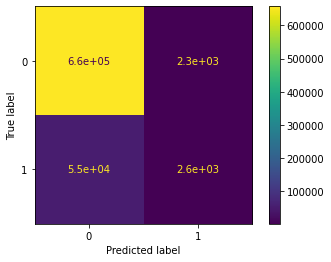

In [14]:
#confusion matrix
plot_confusion_matrix(DT_model,
                      x_test,
                      y_test
)

In [15]:
y_predict = DT_model.predict(x_test)
print('y_predict',y_predict)
print('y_test',y_test)

y_predict [0 0 0 ... 0 0 0]
y_test [0 0 0 ... 1 0 0]


In [16]:
#Accuracy
accuracy_DT = accuracy_score(y_test, y_predict)*100
print('The accuracy of DT is %.3f'%(accuracy_DT))

The accuracy of DT is 92.070


In [17]:
#precision Score
precision_DT = precision_score(y_test, y_predict)*100
print('The precision score of Decision tree is %.3f'%(precision_DT))

The precision score of Decision tree is 53.112


In [19]:
#recall Score
recall_DT = recall_score(y_test, y_predict)*100
print('The recall score of Decision tree is %.3f'%(recall_DT))

The recall score of Decision tree is 4.597


In [20]:
#F1 Score
f1_DT = f1_score(y_test, y_predict)*100
print('The F1 Score of DT is %.3f'%(f1_DT))

The F1 Score of DT is 8.461
